In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')




In [ ]:
# Importing libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium
from folium.plugins import HeatMap
import plotly.express as px


%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DM/hotel_bookings.csv')

In [ ]:
df.head(
  
)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print(df.shape)

(119390, 32)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Number of missing values by column

df.isnull().sum().sort_values(ascending = False)


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
#Percentage of missing values by column

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


In [ ]:
#Replacing NULL values in company and agent columns with 0

values = {'company': 0, 'agent': 0}

df.fillna(value = values, inplace = True)


#Replacing NULL values in country column with most frecuent value

df['country'].fillna(value = df['country'].mode()[0], inplace = True)


#Removing row affected by NULL values in children column

df.dropna(subset = ['children'], inplace = True)

In [ ]:
#Rechecking for NULL values in the data set

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Categorical columns

cat_columns = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


# Unique values in each categorical column

print(f"Unique values by categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = df[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('-' * 70)

UNIQUE VALUES BY CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------------------------------------

is_canceled: 
[0 1]

----------------------------------------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' '

In [ ]:
#Replacing 'undefined' meal with 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

In [ ]:
#Rechecking unique values in meal column

df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [ ]:
grouped_data_distribution_channel=df.groupby(['distribution_channel'])['distribution_channel'].count()
grouped_data_distribution_channel

distribution_channel
Corporate     6677
Direct       14645
GDS            193
TA/TO        97870
Undefined        1
Name: distribution_channel, dtype: int64

In [ ]:
grouped_data_distribution_channel.max()

97870

In [ ]:
#Replacing 'undefined' in distribution_channel with 'TA/TO'

df['distribution_channel'].replace(to_replace = 'Undefined', value = 'TA/TO', inplace = True)

#Rechecking unique values in meal column

df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'GDS'], dtype=object)

In [ ]:
#checking for invalid data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# We first look at the table and analyze the data for outliers we can see some inconsistency in the dataset
# Here we can see in the adults column that there is 55 in maximum and 0 in minumum
# It suggests that the reservation was made with 0 person which is not possible
# Removing otliers from data by dropping the inconsistent entries

df.drop(df[df['adults']==0].index, inplace=True)

#Verification

len(df[df['adults'] == 0])


0

In [ ]:
#for visualizing outliers we will use various visualization tools
df.to_csv('/content/drive/MyDrive/DM/output1.csv',sep=',', index=False)

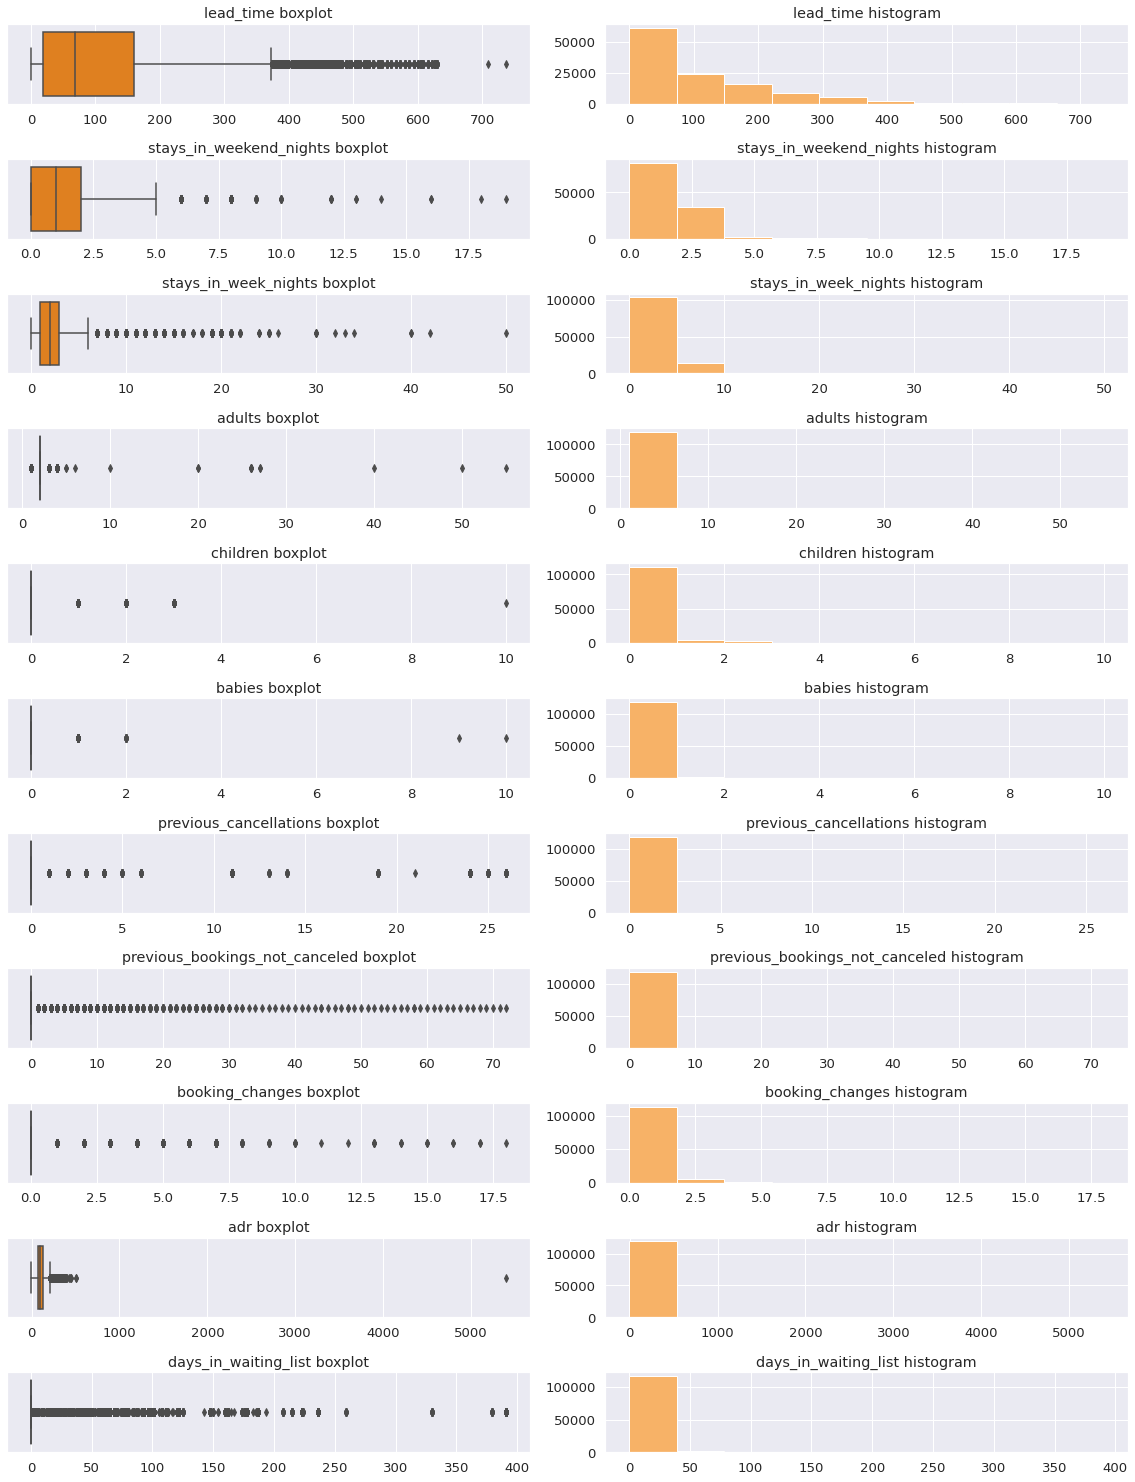

In [ ]:
#Columns from `df.describe()` I want to examine

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']


#Creating a boxplot and a histogram for outlier detection

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16, 28))

for feature in features:
    plt.subplot(15,2,n)
    sns.boxplot(df[feature], palette = 'autumn').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
    plt.subplot(15,2,n)
    plt.hist(df[feature], color = '#f7b267')
    plt.title(f'{feature} histogram')
    n = n + 1
    plt.tight_layout()

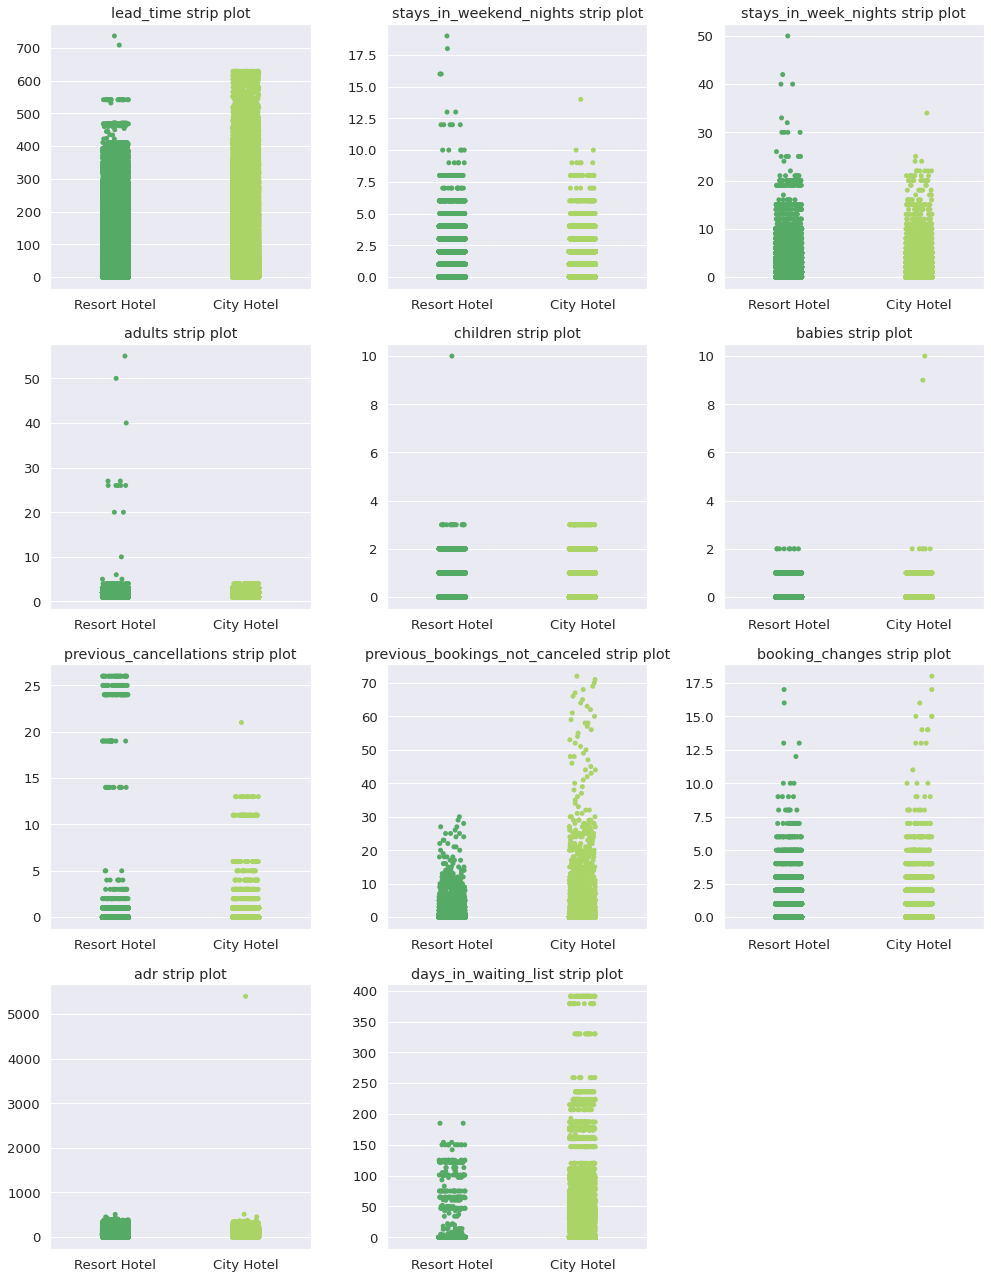

In [ ]:
#Creating a stripplot to visualize differences in data distribution between hotels

features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'adr', 'days_in_waiting_list']

n = 1

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for feature in features:
    plt.subplot(4,3,n)
    sns.stripplot(x = df['hotel'], y = df[feature], palette = 'summer').set(xlabel = None, ylabel = None)
    plt.title(f'{feature} strip plot')
    n = n + 1
    plt.tight_layout()

In [ ]:
# We saw that there are still some outliers in our data
# Number of bookings that have more than 10 previous bookings not canceled for resort

num_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['hotel'] == 'Resort Hotel')])


# Number of bookings made by companies that had more than 10 previous bookings not canceled for resort

num_companies_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] > 0) & (df['hotel'] == 'Resort Hotel')])


# Number of bookings made by private individuals that had more than 10 previous bookings not canceled for resort

num_indiv_high_pb = len(df[(df['previous_bookings_not_canceled'] > 10) & (df['company'] == 0) & (df['hotel'] == 'Resort Hotel')])


# percentage of companies and individuals that had more than 10 previous cancellations for the resort

companies_high_pb_percent = round((num_companies_high_pb / num_high_pb) * 100, 2)
                            
indiv_high_pb_percent = round((num_indiv_high_pb / num_high_pb) * 100, 2)
    
print(f"\nBookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:\n")
print(f"\t{companies_high_pb_percent} % were made by companies.")
print(f"\n\t{indiv_high_pb_percent} % were made by private individuals.")



Bookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:

	70.89 % were made by companies.

	29.11 % were made by private individuals.


In [ ]:
# Using loc[] to set new values for outliers

df.loc[df['lead_time']> 430, ['lead_time']] = 430
df.loc[df['stays_in_weekend_nights']> 8, ['stays_in_weekend_nights']] = 8
df.loc[df['stays_in_week_nights']> 17, ['stays_in_week_nights']] = 17
df.loc[df['adults']> 4, ['adults']] = 4
df.loc[df['children']> 8, ['children']] = 0
df.loc[df['babies']> 8, ['babies']] = 0
df.loc[df['booking_changes']> 6, ['booking_changes']] = 6
df.loc[df['days_in_waiting_list']> 0, ['days_in_waiting_list']] = 1
df.loc[df['previous_cancellations']> 0,['previous_cancellations']] = 1
df.loc[df['previous_bookings_not_canceled'] > 0, ['previous_bookings_not_canceled']] = 1

In [ ]:
# Dropping row with extreme outlier in adr column

df.drop(df[df['adr'] == 5400].index, inplace = True)

In [ ]:
# Checking for duplicated data
df.duplicated().sum()

32036

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 118982, dtype: bool

In [ ]:
df.drop_duplicates(inplace=True)
df.to_csv('/content/drive/MyDrive/DM/preprocessed.csv',sep=',', index=False)

In [ ]:
# Data Transformation
# Aggregating arrival_date_day_of_month, arrival_date_month and arrival_date_year into date time
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df['is_canceled'] = df['is_canceled'].astype('str')
df['previous_cancellations'] = df['previous_cancellations'].astype('str')
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype('str')


In [ ]:
# Creating arrival_date with date time

df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors = 'coerce')

In [ ]:
# Combining children and babies together as kids
df['kids'] = df['children'] + df['babies']

# Creating total_members column
df['total_members'] = df['kids'] + df['adults']

# Total nights per booking
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Changing arrival_date_month column to show month number instead of month name
df['arrival_date_month'] = df['arrival_date'].dt.month

# Creating family column
df['family'] = np.where(df['kids'] > 0, '1', '0')

# Dataset with confirmed bookings only
confirmed_bookings = df[df['is_canceled'] == '0']

# Dataset with canceled bookings only
canceled_bookings = df[df['is_canceled'] == '1']


In [ ]:
df.to_csv('/content/drive/MyDrive/DM/transformed.csv',sep=',', index=False)

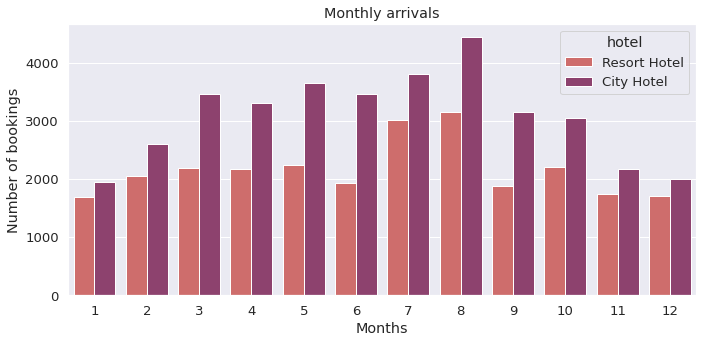

In [ ]:
## EDA
plt.figure(figsize = (10, 5))

sns.countplot(x = 'arrival_date_month', data = confirmed_bookings, hue = 'hotel', palette = 'flare')
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

plt.tight_layout()

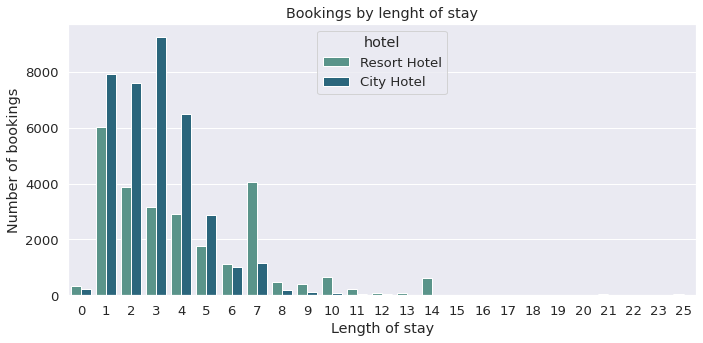

In [ ]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'total_nights', data = confirmed_bookings, hue = 'hotel', palette = 'crest')
plt.title('Bookings by lenght of stay')
plt.xlabel('Length of stay')
plt.ylabel('Number of bookings')

plt.tight_layout()

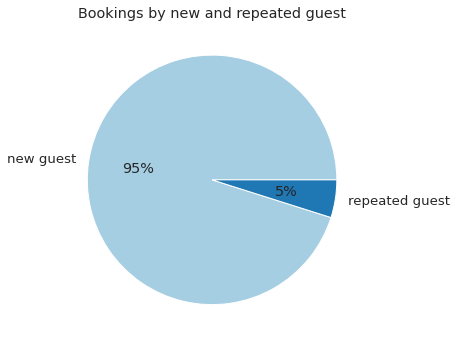

In [ ]:
plt.figure(figsize = (10, 5))

data = confirmed_bookings['is_repeated_guest'].value_counts()
colors = sns.color_palette('Paired')
labels = ['new guest', 'repeated guest']

plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Bookings by new and repeated guest')

plt.tight_layout()

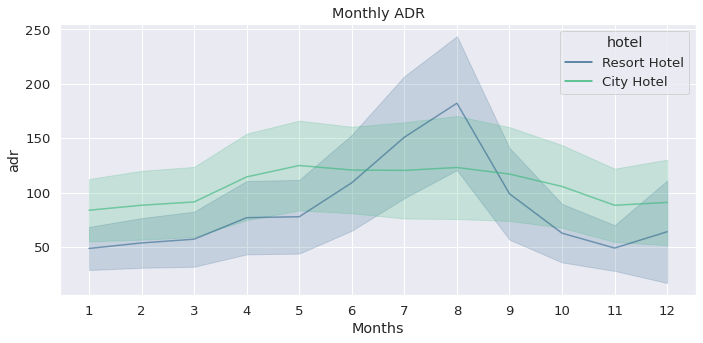

In [ ]:
plt.figure(figsize = (10, 5))

months = confirmed_bookings['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', y = 'adr', hue = 'hotel', data = confirmed_bookings, ci = 'sd', palette = 'viridis', alpha = 0.6)
plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

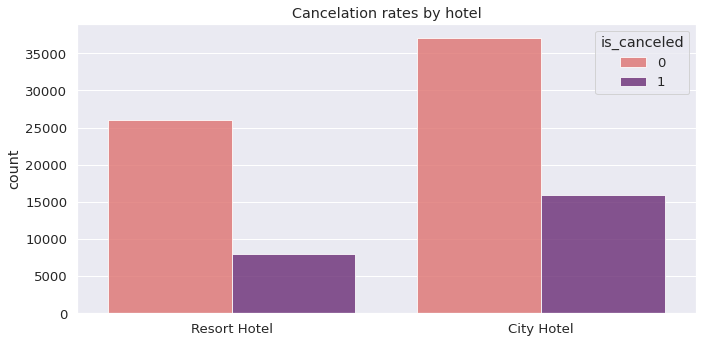

In [ ]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'hotel', data = df, hue = 'is_canceled', palette = 'magma_r', alpha = 0.8).set(xlabel = None)
plt.title('Cancelation rates by hotel')

plt.tight_layout()

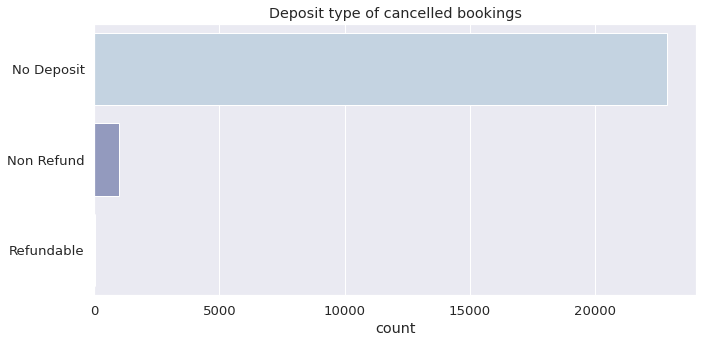

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(ax = ax, y = 'deposit_type', data = canceled_bookings, orient = "h" ,palette = 'BuPu').set(ylabel = None)
plt.title('Deposit type of cancelled bookings')

plt.tight_layout()

<Figure size 1008x360 with 0 Axes>

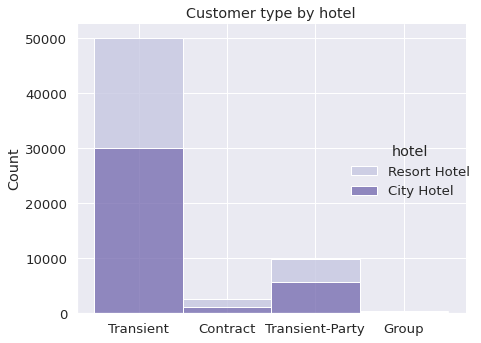

In [ ]:
# most common customers in hotel
plt.figure(figsize = (14, 5))

sns.displot(confirmed_bookings, x = 'customer_type', hue = 'hotel', multiple = 'stack', palette = 'Purples', alpha = 0.8).set(xlabel = None)
plt.title('Customer type by hotel')

plt.tight_layout()

In [ ]:
import plotly.graph_objects as go

labels = confirmed_bookings['meal'].unique()
values = confirmed_bookings['meal'].value_counts()
palette = ["#f6bd60", "#f5cac3", "#84a59d", "#f28482"]

fig = go.Figure(data=[go.Pie(labels = labels, 
                             values = values, 
                             hole=.5, 
                             title = 'Meal plans', 
                             legendgroup = True, 
                             pull = [0.1, 0.1, 0.1, 0.1]
                            )
                     ]
               )

fig.update_traces(marker = dict(colors = palette))

fig.show()

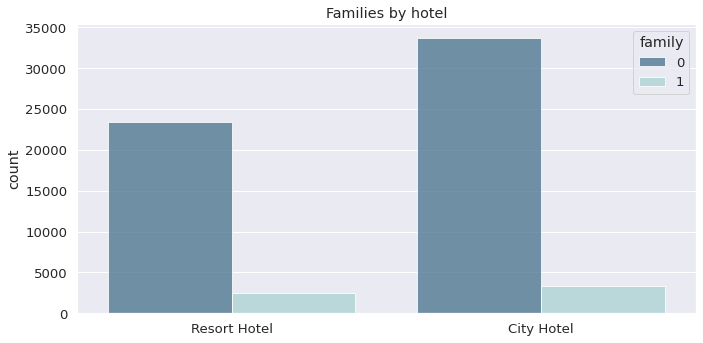

In [ ]:
#Hotels preferred by adults and children
plt.figure(figsize = (10, 5))

palette = ["#457b9d", "#a8dadc"]

sns.countplot(data = confirmed_bookings, x = 'hotel', hue = 'family', palette = palette, alpha = 0.8).set(xlabel = None)
plt.title('Families by hotel')

plt.tight_layout()



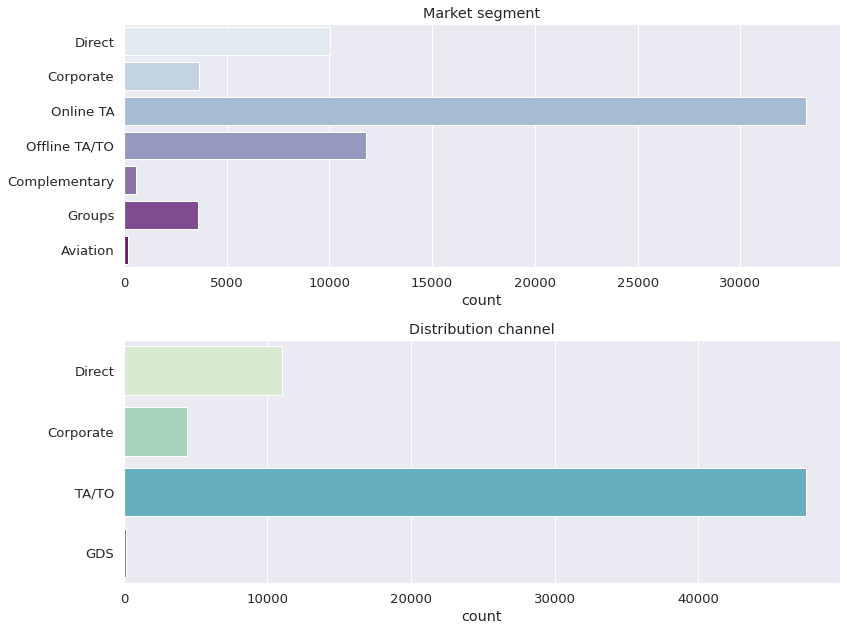

In [ ]:
plt.figure(figsize = (12, 9))

plt.subplot(2,1,1)
sns.countplot(data = confirmed_bookings, y = 'market_segment', orient = "h" ,palette = 'BuPu').set(ylabel = None)
plt.title('Market segment')

plt.subplot(2,1,2)
sns.countplot(data = confirmed_bookings, y = 'distribution_channel', orient = "h" ,palette = 'GnBu').set(ylabel = None)
plt.title('Distribution channel')

plt.tight_layout()

In [ ]:
import math
#Calculating information gain for decision trees
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [ ]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [ ]:
def highest_info_gain(columns):
  #Intialize an empty dictionary for information gains
  information_gains = {}
  
  #Iterate through each column name in our list
  for col in columns:
    print(col)
    #Find the information gain for the column
    information_gain = calc_information_gain(df, col,'is_canceled')
    #Add the information gain to our dictionary using the column name as the ekey                                         
    information_gains[col] = information_gain
    print(information_gains[col])
  
  #Return the key with the highest value                                          
  return max(information_gains, key=information_gains.get)

In [ ]:
print(highest_info_gain(df.columns))

hotel
0.003772564792046018
is_canceled
0.8485135927643211
lead_time
0.8453272950193472
arrival_date_year
0.33374574019335745
arrival_date_month
0.6278371936902427
arrival_date_week_number
0.8017176923486559
arrival_date_day_of_month
0.7917176100817599
stays_in_weekend_nights
0.3043792172305856
stays_in_week_nights
0.6054174988032861
adults
0.07042520777370964
children
0.04205592843852568
babies
0.0004542256476007811
meal
0.19570678929041907
country
0.4659921692928752
market_segment
0.7414839160750593
distribution_channel
0.7267033104492039
is_repeated_guest
0.0071610756201888615
previous_cancellations
0.009936101465295444
previous_bookings_not_canceled
0.010343588919652924
reserved_room_type
0.30275329816803775
assigned_room_type
0.3589615265306586
booking_changes
0.839730565660819
deposit_type
0.02143846848243247
agent
0.7721184740160352
company
0.03678124841719099
days_in_waiting_list
0.0001555219544280284
customer_type
0.0975131877898836
adr
0.8310007123050341
required_car_parking_s

In [ ]:
df.describe(include='object').transpose()

,count,unique,top,freq
hotel,86946,2,City Hotel,53032
is_canceled,86946,2,0,63038
arrival_date_year,86946,3,2016,42133
arrival_date_day_of_month,86946,31,17,3007
meal,86946,4,BB,67638
country,86946,177,PRT,27700
market_segment,86946,7,Online TA,51362
distribution_channel,86946,4,TA/TO,68821
is_repeated_guest,86946,2,0,83613
previous_cancellations,86946,2,0,85283
